# Univariate Modelling

In [1]:
import os
import joblib
import pandas as pd

stored_models = [file for file in os.listdir() if file.endswith('.model.pkl')]
stored_models

['xgb.model.pkl', 'bagging.model.pkl', 'knr.model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor

estimators = []
for model_file in stored_models:
    print(f'Loading {model_file}')
    model = joblib.load(model_file)
    estimators.append((
        model_file.replace('.model.pkl', ''),
        model
    ))

estimators

Loading xgb.model.pkl
Loading bagging.model.pkl
Loading knr.model.pkl


[('xgb',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7612017850387426, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=30.0, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.016701919192712432, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=5, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=360, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)),
 ('bagging',
  BaggingRegressor(estimator=DecisionTreeRegressor(),
                   max_features=0.8999024676083198,
                   max_samples=0.5015539361705462, n_estimator

In [3]:
# Load, preprocess and standardize the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

ensemble = VotingRegressor(estimators=estimators, verbose=True)
ensemble.fit(X=X_train, y=y_train)
ensemble.score(X=X_train, y=y_train)

[Voting] ...................... (1 of 3) Processing xgb, total=   2.9s
[Voting] .................. (2 of 3) Processing bagging, total= 2.1min
[Voting] ...................... (3 of 3) Processing knr, total=   0.2s


0.7351552263683214

# Prepare test results

In [4]:
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')

In [5]:
## Load the test data
test_data = pd.read_csv(test_file, index_col=0)
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pipelines import pipeline

test_data = pipeline.fit_transform(test_data)
test_data.head()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.508634,1.497254,1.485595,1.503135,1.531334,1.554235,1.624081,1.702828,1.778934,1.732729,...,0.393620,0.310098,0.225818,0.247508,0.269567,0.297295,False,True,False,False
p01_8460,-0.322447,-0.484192,-0.646423,-0.809978,-0.925228,-1.035570,-1.140570,-1.201753,-1.261417,-1.321140,...,-0.713113,-0.719509,-0.726487,-0.905094,-1.079105,-1.256018,False,False,False,True
p01_8461,-1.107196,-1.097737,-1.088918,-1.081518,-1.076867,-1.065919,-1.049760,-1.110668,-1.170206,-1.229828,...,-0.157173,-0.134096,-0.112097,-0.143554,-0.173127,-0.199765,False,False,False,False
p01_8462,-1.514662,-1.560409,-1.606837,-1.654768,-1.622770,-1.581856,-1.534079,-1.394042,-1.251282,-1.108079,...,-0.198353,-0.123826,-0.050658,0.093142,0.238681,0.390494,False,False,True,False
p01_8463,-1.348657,-1.439712,-1.531412,-1.624597,-1.663207,-1.693137,-1.715698,-1.738139,-1.758008,-1.777698,...,-1.639680,-1.582223,-1.525194,-1.368194,-1.202647,-1.038554,False,False,True,False


In [7]:
# Predict the bg+1:00 values
test_data['bg+1:00'] = ensemble.predict(test_data)
test_data.head()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.508634,1.497254,1.485595,1.503135,1.531334,1.554235,1.624081,1.702828,1.778934,1.732729,...,0.310098,0.225818,0.247508,0.269567,0.297295,False,True,False,False,8.691452
p01_8460,-0.322447,-0.484192,-0.646423,-0.809978,-0.925228,-1.035570,-1.140570,-1.201753,-1.261417,-1.321140,...,-0.719509,-0.726487,-0.905094,-1.079105,-1.256018,False,False,False,True,6.506341
p01_8461,-1.107196,-1.097737,-1.088918,-1.081518,-1.076867,-1.065919,-1.049760,-1.110668,-1.170206,-1.229828,...,-0.134096,-0.112097,-0.143554,-0.173127,-0.199765,False,False,False,False,6.592235
p01_8462,-1.514662,-1.560409,-1.606837,-1.654768,-1.622770,-1.581856,-1.534079,-1.394042,-1.251282,-1.108079,...,-0.123826,-0.050658,0.093142,0.238681,0.390494,False,False,True,False,10.328508
p01_8463,-1.348657,-1.439712,-1.531412,-1.624597,-1.663207,-1.693137,-1.715698,-1.738139,-1.758008,-1.777698,...,-1.582223,-1.525194,-1.368194,-1.202647,-1.038554,False,False,True,False,7.280976


## Prepare the submission file

In [8]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,8.691452
p01_8460,6.506341
p01_8461,6.592235
p01_8462,10.328508
p01_8463,7.280976
...,...
p24_256,6.400267
p24_257,9.607723
p24_258,6.373773


### Save the submission file

In [9]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')

## Evaluate the model

RMSE: 1.5420342686677955
R2: 0.7351552263683214


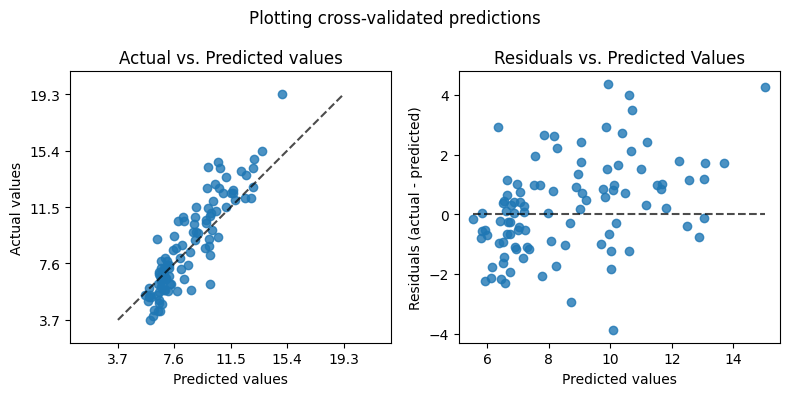

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = ensemble.predict(X=X_train)
print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();